In [2]:
import pandas as pd


***After the bias introduced by the data filling, I just use raw datas***

In [3]:
path_data = "..\\data\\NOMAL.xlsx"
raw_df = pd.read_excel(path_data)

In [4]:
raw_df.head(5)

,Codice identificativo:,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,...,Trasfusione:,Unità trasfuse,Altri eventi avversi,Diarrea e disidratazione,Ipertransaminasemia tardiva,Polmonite,IVU nosocomiale,Esofagite,Dispepsia,Tachiaritmia sopraventricolare
0,3761,1,1,57,0.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35319,0,0,62,0.0,0,0,0,0,0,...,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BS01,1,0,72,0.0,1,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BS-004,1,0,53,0.0,1,1,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BS-005,0,1,58,0.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import re

# Function to remove special characters from a string
def remove_special_characters(string):
    return re.sub(r'\W+', '', string)

# Rename the features in raw_df
raw_df.rename(columns=lambda x: remove_special_characters(x), inplace=True)


In [6]:
# Rename the feature 'Column1' to 'NewColumn' (modifying in place)
raw_df.rename(columns={'ArtesunatoevSomministrazione1Datainizioeora': 'Artesunate'}, inplace=True)
raw_df.rename(columns={'PADHpostartesunatedelayedhaemoly1s': 'PADH'}, inplace=True)


In [7]:
patient_general = ['Codiceidentificativo', 'Sesso', 'Nazionalità', 'Età', 'Domicilio', 'Altezza', 'Peso', 'SubSaharanAfrica', 'Pregressamalaria', 'Profilassi']
comorbidities = ['Comorbilità', 'Diabete', 'HIV', 'IRC']
patient_state_arrival = ['GCS',
 'Prostrazione',
 'Shock',
 'Bleeding',
 'ARDS',
 'Anemia',
 'Creatinina',
 'Glicemia',
 'Acidosi',
 'Bilirubina',
 'Hyperparasitaemia',
 'Numerocriteri']
diagnosis_type = ['Emoscopia', 'NAAT']
diagnosis_result = ['Falciparum',
 'Ovale',
 'Parassitemiavaloreassoluto',
 'Percentualeparassitemia']
baseline_other = ['PAsistolica',
 'PAdiastolica',
 'FC',
 'FR',
 'Temperatura',
 'Ritardoterapeutico']
QTc = ['QTcingresso', 'QTcdopoACT', 'QTCdopoultimasomministrazioneartesunato']
T0 = ['T0GBincellul',
 'T0GRincellul',
 'T0Hbingdl',
 'T0PLTincellul',
 'T0Glicemiainmgdl',
 'T0Azotemiainmgdl',
 'T0Creatininainmgdl',
 'T0LDHinUL',
 'T0ASTinUL',
 'T0ALTinUL',
 'T0Bilirubinatotinmgdl',
 'T0Bilirubinadirettainmgdl',
 'T0SodioinmEql',
 'T0PotassioinmEql',
 'T0Cainmgdl',
 'T0INR',
 'T0fibrinogenoinmgdl',
 'T0pH',
 'T0bicarbonatiinmmoll',
 'T0Lattatiinmmoll']
T1 = ['T1Gocciaspessaestriscioperiferico', 'T1TCtemperaturacorporeainC']
T2 = ['T2Gocciaspessaestriscioperiferico', 'T2TCtemperaturacorporeainC']
T3 = ['T3Gocciaspessaestriscioperiferico', 'T3TCtemperaturacorporeainC']
T7 = ['T7Gocciaspessaestriscioperiferico', 'T7TCtemperaturacorporeainC']
treatment = ['Artesunate',
 'ArtemetherLumefantrinaSomministrazione1Datainizioeora',
 'DiidroartemisininaPiperachinaSomministrazione1Datainizioeora',
 'ACT',
 'ArtesunatoACT',
 'AtovaquoneProguanile',
 'Doxiciclinaperos',
 'Clindamicina',
 'Antibiotici',
 'Chinino',
 'Primachina',
 'DurataArtesunato']
outcome = ['Durataricovero',
 'Decesso',
 'ICU',
 'Eventualisequele',
 'PADH',
 'InsorgenzaPADH',
 'PermanenzainTerapiaIntensivagiorni',
 'TrasferimentoinRianimazioneancheinaltrocentro',
 'Guarigione']
PADH_info = ['InsorgenzaPADH',
 'SipregadiforniretuttiiparamerivitaliGBincellul',
 'SipregadiforniretuttiiparamerivitaliHbingdl',
 'SipregadiforniretuttiiparamerivitaliPLTincellul',
 'Sipregadiforniretuttiiparamerivitalireticolitiincellul',
 'SipregadiforniretuttiiparamerivitaliLDHinUllcio',
 'SipregadiforniretuttiiparamerivitaliASTUL',
 'SipregadiforniretuttiiparamerivitaliALTUL',
 'SipregadiforniretuttiiparamerivitaliBilirubinatotmgdl',
 'SipregadiforniretuttiiparamerivitaliBilirubinadirettamgdl',
 'Sipregadiforniretuttiiparamerivitaliaptoglobinainmgdl',
 'SipregadiforniretuttiiparamerivitalitestdiCoombsdiretto',
 'Sipregadiforniretuttiiparamerivitalitestdicoombsindiretto',
 'Vuoleriportareulterioriinformazionirelativeaiprelievieffettuatidurantelevisiteintermediefinoallarisoluzionedellemolisi',
 'NadirHb',
 'Trasfusione',
 'Unitàtrasfuse']
follow_up = ['Altrieventiavversi',
 'Diarreaedisidratazione',
 'Ipertransaminasemiatardiva',
 'Polmonite',
 'IVUnosocomiale',
 'Esofagite',
 'Dispepsia',
 'Tachiaritmiasopraventricolare']

***Restrict the dataframe to only the patients who got administrated Artsunate***

In [8]:
artsnt_df = raw_df[raw_df['Artesunate'] == 1]

In [9]:
print('raw_df len : ' + str(len(raw_df))+' // artsnt len : '+str(len(artsnt_df)))

raw_df len : 72 // artsnt len : 55


In [10]:
artsnt_df['PADH'].sum()

7.0

In [11]:
artsnt_df.head(5)

,Codiceidentificativo,Sesso,Nazionalità,Età,Domicilio,Comorbilità,Diabete,HIV,Cirrosi,IRC,...,Trasfusione,Unitàtrasfuse,Altrieventiavversi,Diarreaedisidratazione,Ipertransaminasemiatardiva,Polmonite,IVUnosocomiale,Esofagite,Dispepsia,Tachiaritmiasopraventricolare
2,BS01,1,0,72,0.0,1,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BS-004,1,0,53,0.0,1,1,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BS-005,0,1,58,0.0,0,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,RM01-27,1,0,60,0.0,1,0,0,0,0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,B001,1,0,72,0.0,1,0,0,0,0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\balth\AppData\Local\Temp/ipykernel_16780/2274167390.py:20: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if artsnt_df[feature].dtype != np.object:  # Check if the feature is not a string
C:\Users\balth\AppData\Local\Temp/ipykernel_16780/2274167390.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels


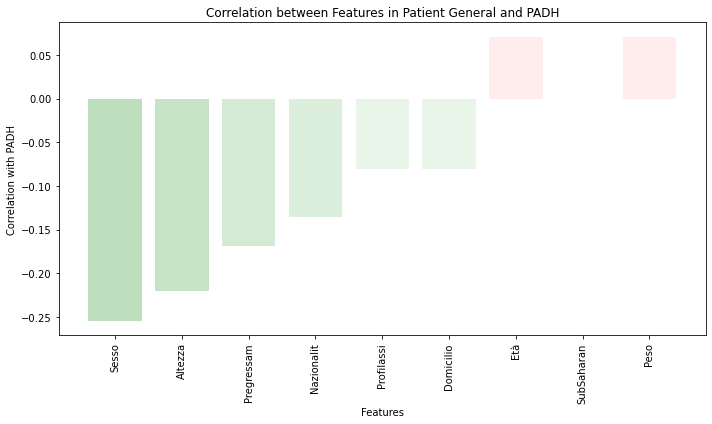

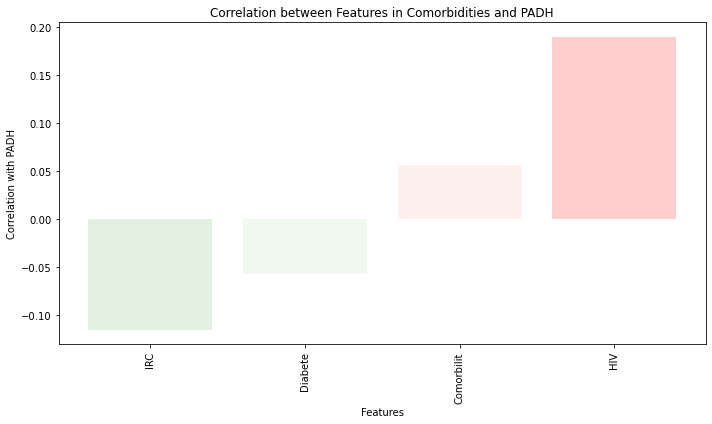

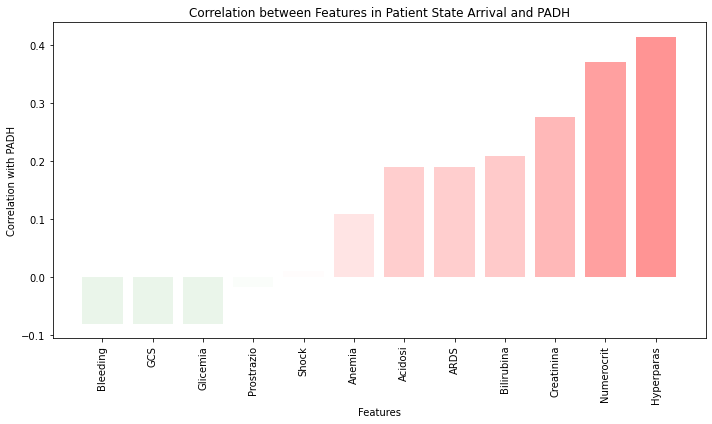

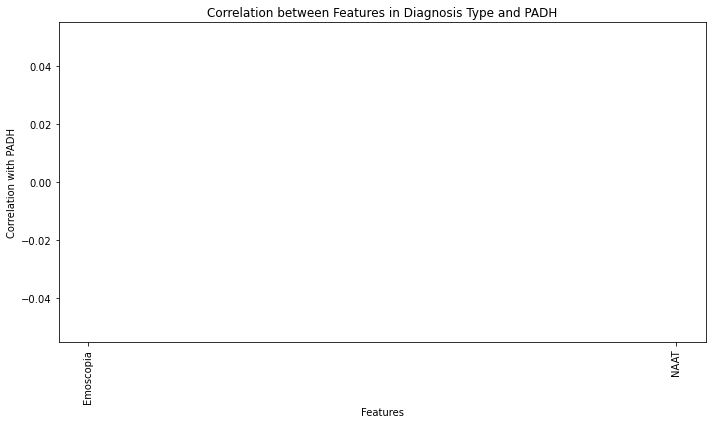

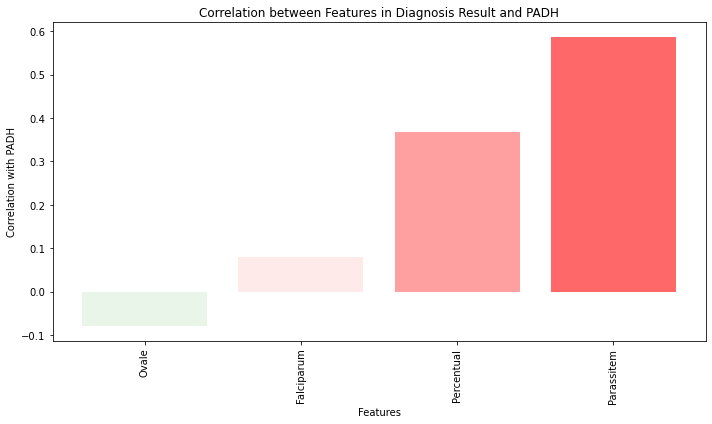

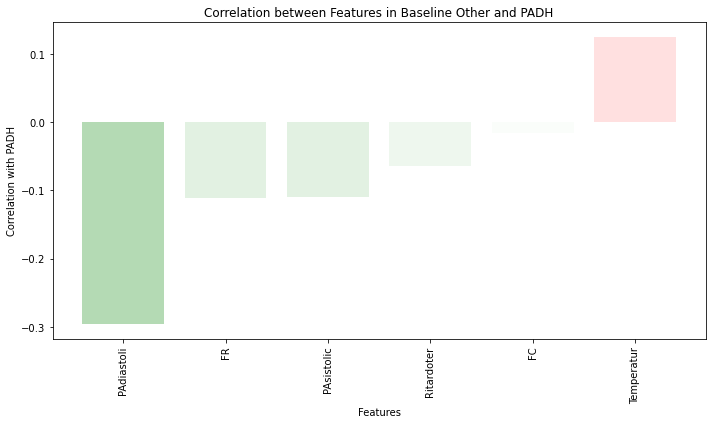

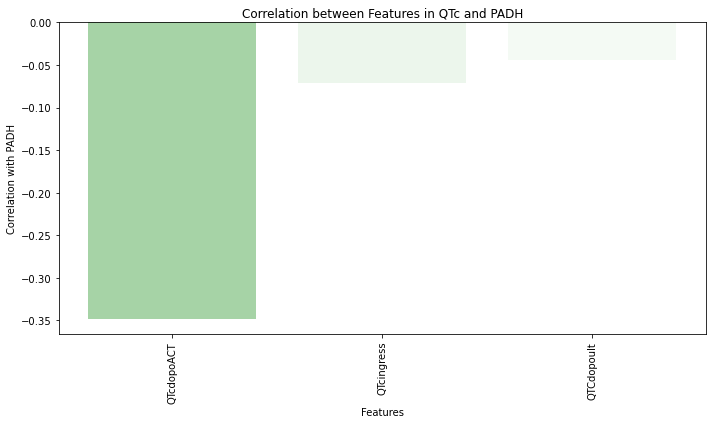

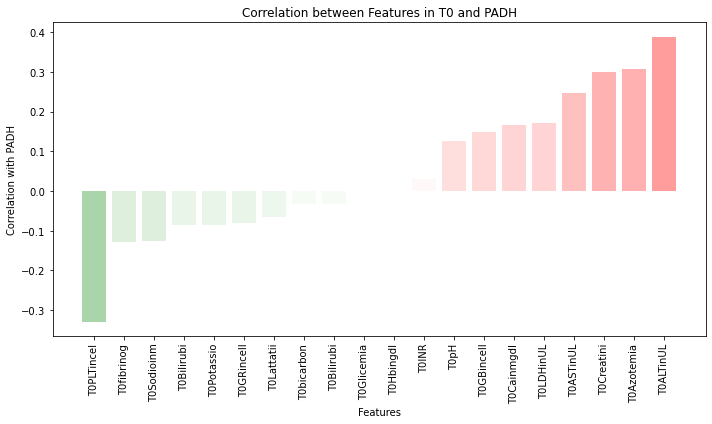

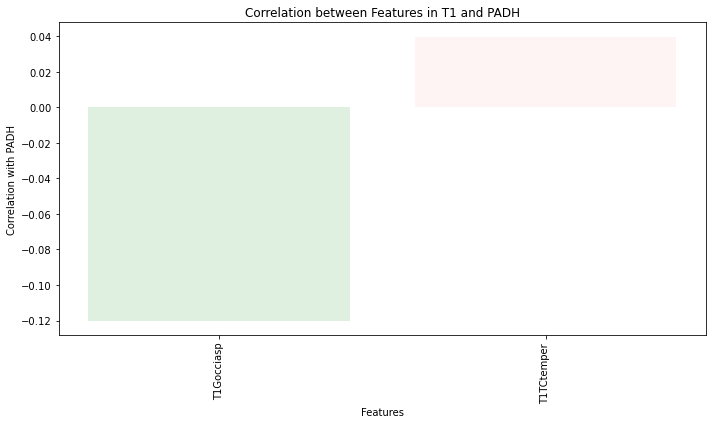

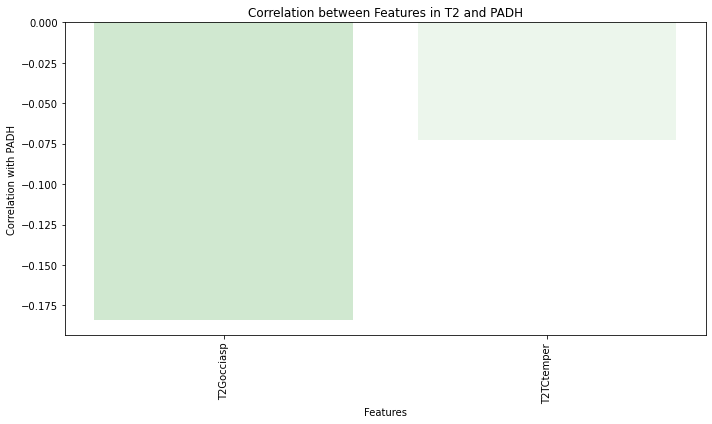

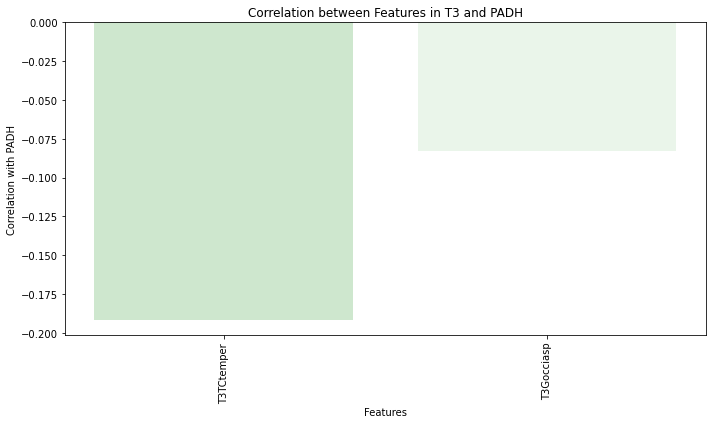

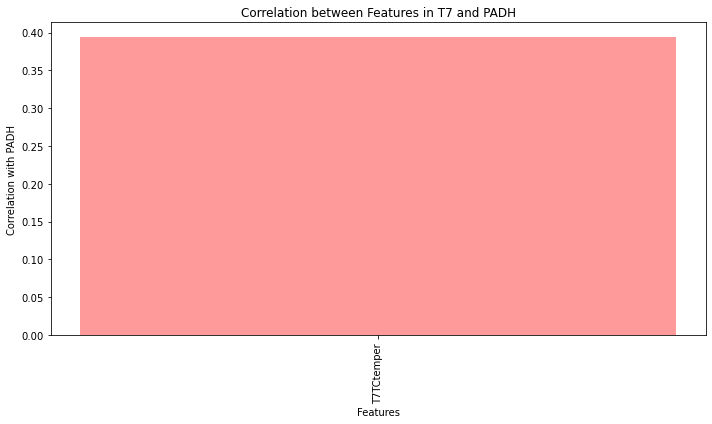

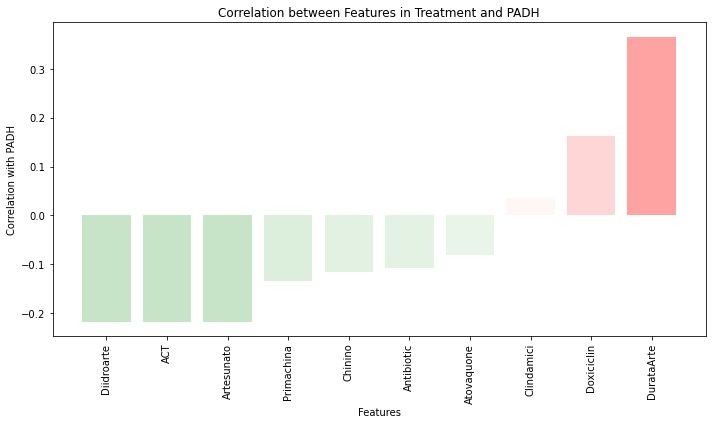

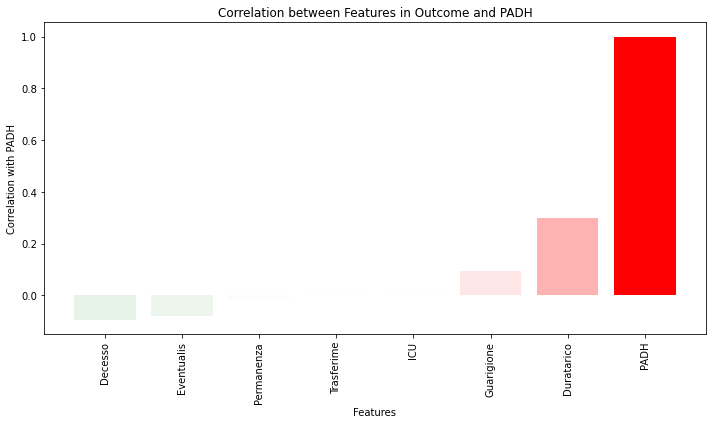

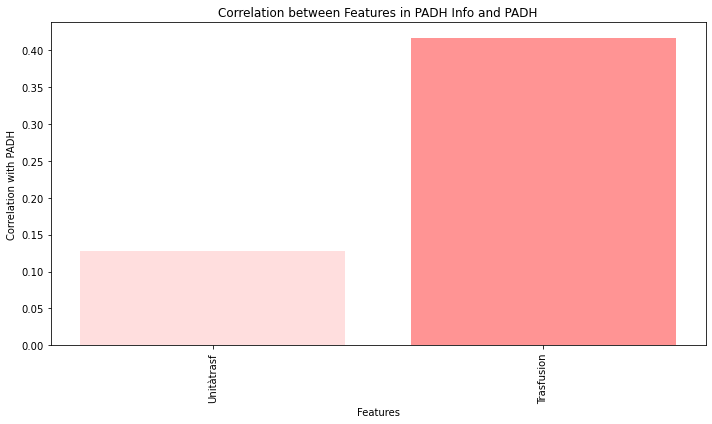

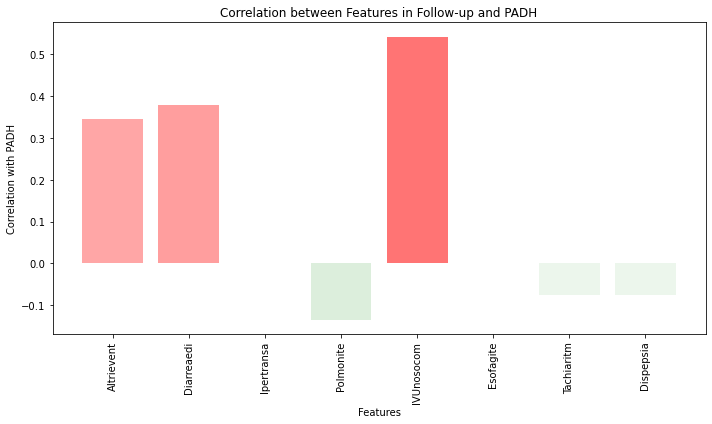

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Define the category lists
categories = [patient_general, comorbidities, patient_state_arrival, diagnosis_type, diagnosis_result, baseline_other, QTc, T0, T1, T2, T3, T7, treatment, outcome, PADH_info, follow_up]
category_names = ['Patient General', 'Comorbidities', 'Patient State Arrival', 'Diagnosis Type', 'Diagnosis Result', 'Baseline Other', 'QTc', 'T0', 'T1', 'T2', 'T3', 'T7', 'Treatment', 'Outcome', 'PADH Info', 'Follow-up']

# Get the 'PADH' column from artsnt_df
target_column = artsnt_df['PADH']

# Iterate over each category
for category, category_name in zip(categories, category_names):
    # Filter the features based on the current category
    features = [feature for feature in artsnt_df.columns if feature in category]

    # Calculate the correlation between each feature and PADH
    correlations = []
    for feature in features:
        if artsnt_df[feature].dtype != np.object:  # Check if the feature is not a string
            correlation = artsnt_df[feature].corr(target_column)
            correlations.append((feature, correlation))

    # Sort the correlation values in ascending order
    correlations.sort(key=lambda x: x[1])

    # Prepare colors for the bars based on correlation values
    cmap = colors.LinearSegmentedColormap.from_list('correlation_cmap', ['green', 'white', 'red'])
    norm = colors.Normalize(vmin=-1, vmax=1)

    # Plot the correlation values on a bar chart with colored bars
    plt.figure(figsize=(10, 6))
    features, correlation_values = zip(*correlations)
    bar_colors = cmap(norm(correlation_values))
    plt.bar(features, correlation_values, color=bar_colors)
    plt.xlabel('Features')
    plt.ylabel('Correlation with PADH')
    plt.title(f'Correlation between Features in {category_name} and PADH')
    plt.xticks(rotation=90)
    plt.gca().set_xticklabels([label[:10] for label in features])  # Display only the first 10 characters of the labels
    plt.tight_layout()
    plt.show()


In [13]:
patient_general_noID = ['Sesso', 'Nazionalità', 'Età', 'Domicilio','Altezza','Peso', 'Sub-Saharan Africa', 'Pregressa malaria', 'Profilassi']

# And we will only keep the features that do not introduce "bias" in our graphe
predictive_categories = [patient_general_noID, comorbidities, patient_state_arrival, diagnosis_result, baseline_other, T0, treatment]

In [14]:
# Create an empty list to store selected feature names
selected_features = []

# Iterate over predictive_categories
for category in predictive_categories:
    # Check if any column in artsnt_df is present in the current category
    selected_features.extend([feature for feature in artsnt_df.columns if feature in category])

# Create predictive_artsnt_df DataFrame with selected features
predictive_artsnt_df = artsnt_df[selected_features]


In [15]:
correlations = []

# Iterate over selected features
for feature in selected_features:
    # Calculate correlation between the selected feature and "PADH"
    correlation = artsnt_df[feature].corr(artsnt_df["PADH"])
    correlations.append((feature, correlation))

# Sort the correlations in descending order based on absolute values
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature/correlation pairs
for feature, correlation in correlations:
    print(f"Feature: {feature}, Correlation with PADH: {correlation}")


Feature: Parassitemiavaloreassoluto, Correlation with PADH: 0.5869520969550349
Feature: Hyperparasitaemia, Correlation with PADH: 0.41461399144838584
Feature: T0ALTinUL, Correlation with PADH: 0.388758553540965
Feature: Numerocriteri, Correlation with PADH: 0.371641455952791
Feature: Percentualeparassitemia, Correlation with PADH: 0.3676513119451234
Feature: T0PLTincellul, Correlation with PADH: -0.32886876022963524
Feature: T0Creatininainmgdl, Correlation with PADH: 0.30028592430050893
Feature: PAdiastolica, Correlation with PADH: -0.2965999096425687
Feature: Creatinina, Correlation with PADH: 0.2762874885599711
Feature: Sesso, Correlation with PADH: -0.25498210332467075
Feature: T0ASTinUL, Correlation with PADH: 0.24781927556062455
Feature: Altezza, Correlation with PADH: -0.21986629534318436
Feature: Bilirubina, Correlation with PADH: 0.20865621238292037
Feature: HIV, Correlation with PADH: 0.18970080273373413
Feature: ARDS, Correlation with PADH: 0.18970080273373413
Feature: Acidos

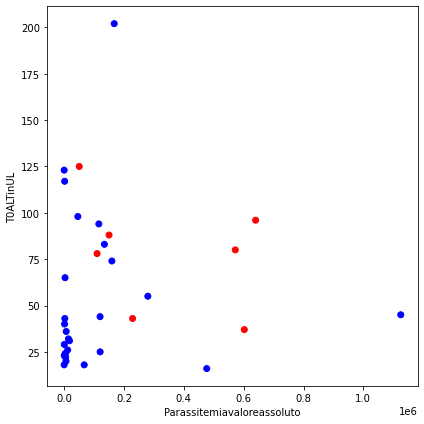

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_artsnt_df['Parassitemiavaloreassoluto']
feature2 = predictive_artsnt_df['T0ALTinUL']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('Parassitemiavaloreassoluto')
plt.ylabel('T0ALTinUL')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


***For now it seems that parassitemia is the only relevant value. When this value is very close to zero there are few chances of PADH***

***Let's see if we can extract other interesting features with a Tree***

We need to build predictive df for the tree

In [17]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')


In [18]:
# Rename the feature 'Column1' to 'NewColumn' (modifying in place)
predictive_df.rename(columns={'ArtesunatoevSomministrazione1Datainizioeora': 'Artesunate'}, inplace=True)
predictive_df.rename(columns={'PADHpostartesunatedelayedhaemoly1s': 'PADH'}, inplace=True)
predictive_df = predictive_df[predictive_df['Artesunate'] == 1]

filtered_df.rename(columns={'ArtesunatoevSomministrazione1Datainizioeora': 'Artesunate'}, inplace=True)
filtered_df.rename(columns={'PADHpostartesunatedelayedhaemoly1s': 'PADH'}, inplace=True)
filtered_df = filtered_df[filtered_df['Artesunate'] == 1]


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


[Text(0.625, 0.875, 'T0bicarbonatiinmmoll <= 26.701\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.5, 0.625, 'T0ALTinUL <= 66.5\ngini = 0.454\nsamples = 23\nvalue = [15, 8]'),
 Text(0.25, 0.375, 'Sesso <= 0.5\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.75, 0.375, 'Glicemia <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]')]

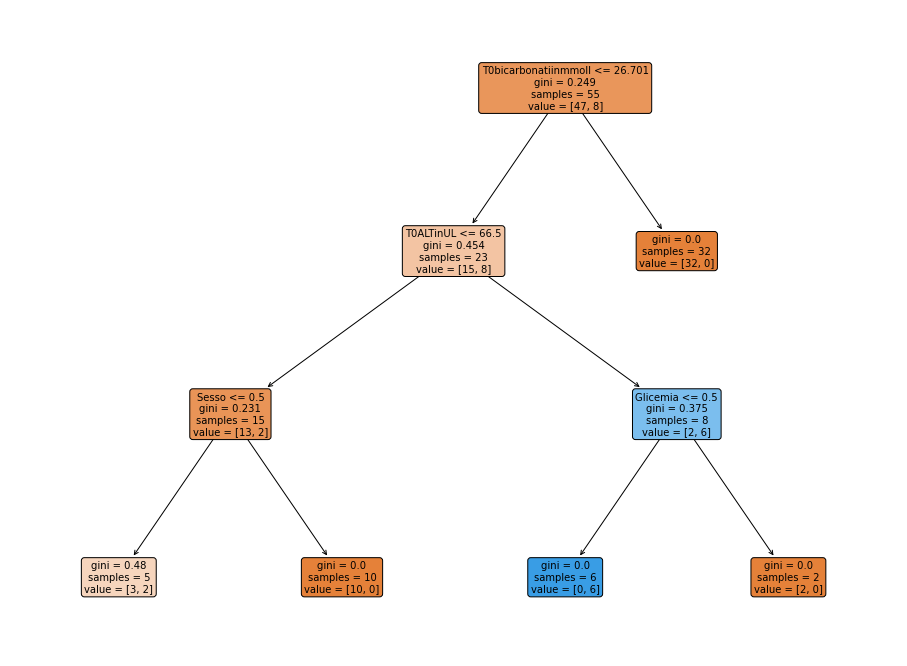

In [20]:
# Step 1: Get all the features from predictive_artsnt_df
features = predictive_df[predictive_df['Artesunate'] == 1]

# Step 2: Get the target variable from filtered_df
target = filtered_df['PADH']

# Step 3: Create a decision tree classifier with max depth of 8
clf = DecisionTreeClassifier(min_samples_leaf=2, max_depth=3)
# clf = DecisionTreeClassifier(max_depth=5)
clf.fit(features, target)

# Step 4: Set a larger figure size 
plt.figure(figsize=(16, 12))

# Step 5: Print the decision tree
tree.plot_tree(clf, feature_names=features.columns, filled=True, rounded=True, fontsize=10)


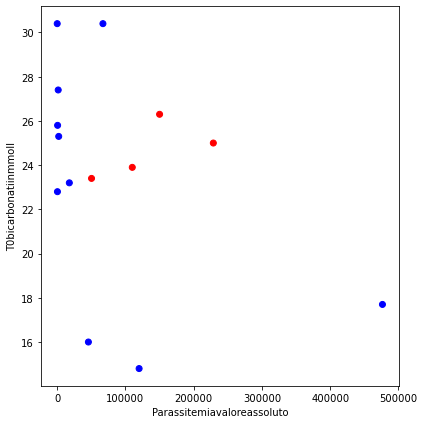

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_artsnt_df['Parassitemiavaloreassoluto']
feature2 = predictive_artsnt_df['T0bicarbonatiinmmoll']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('Parassitemiavaloreassoluto')
plt.ylabel('T0bicarbonatiinmmoll')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


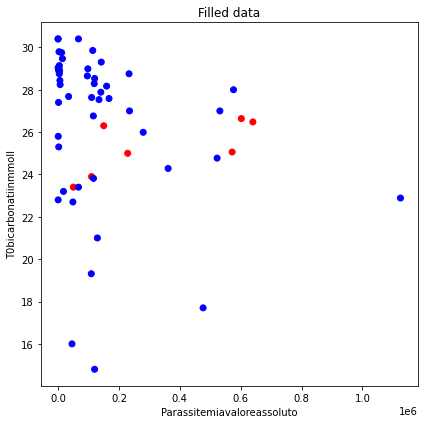

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_df['Parassitemiavaloreassoluto']
feature2 = predictive_df['T0bicarbonatiinmmoll']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))
plt.title('Filled data')
plt.scatter(feature1, feature2, c=colors)
plt.xlabel('Parassitemiavaloreassoluto')
plt.ylabel('T0bicarbonatiinmmoll')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


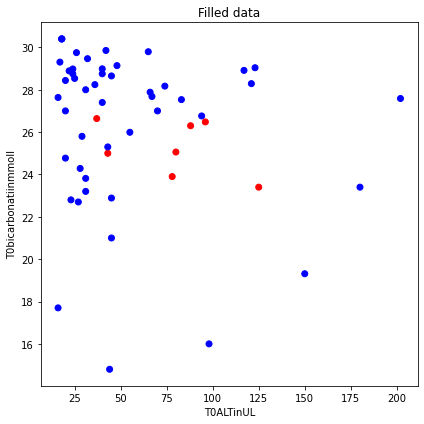

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_df['T0ALTinUL']
feature2 = predictive_df['T0bicarbonatiinmmoll']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))
plt.title('Filled data')
plt.scatter(feature1, feature2, c=colors)
plt.xlabel('T0ALTinUL')
plt.ylabel('T0bicarbonatiinmmoll')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


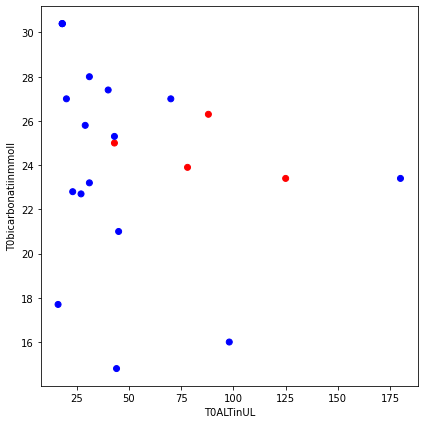

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_artsnt_df['T0ALTinUL']
feature2 = predictive_artsnt_df['T0bicarbonatiinmmoll']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('T0ALTinUL')
plt.ylabel('T0bicarbonatiinmmoll')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


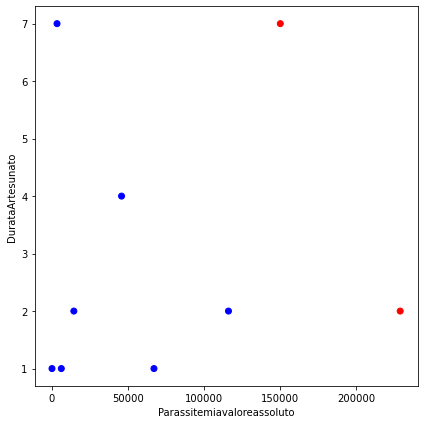

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_artsnt_df['Parassitemiavaloreassoluto']
feature2 = predictive_artsnt_df['DurataArtesunato']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))

plt.scatter(feature1, feature2, c=colors)
plt.xlabel('Parassitemiavaloreassoluto')
plt.ylabel('DurataArtesunato')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


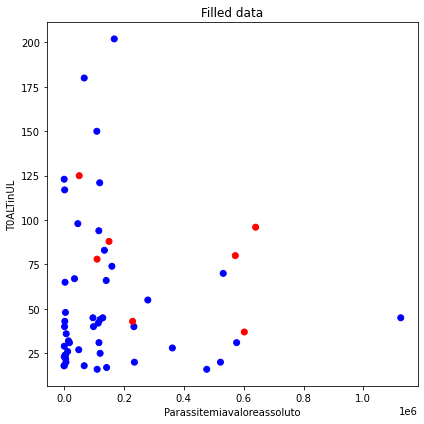

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the two features from predictive_artsnt_df for male and female dataframes
feature1 = predictive_df['Parassitemiavaloreassoluto']
feature2 = predictive_df['T0ALTinUL']

# Step 2: Extract the PADH labels from artsnt_df for male and female dataframes
PADH_labels = artsnt_df['PADH']

# Step 3: Map the PADH labels to colors for male and female dataframes
colors = ['red' if label == 1 else 'blue' for label in PADH_labels]

# Step 4: Create the scatter plots for male and female dataframes
plt.figure(figsize=(6, 6))
plt.title('Filled data')
plt.scatter(feature1, feature2, c=colors)
plt.xlabel('Parassitemiavaloreassoluto')
plt.ylabel('T0ALTinUL')

# Step 5: Adjust spacing between subplots
plt.tight_layout()

# Step 6: Show the plot
plt.show()


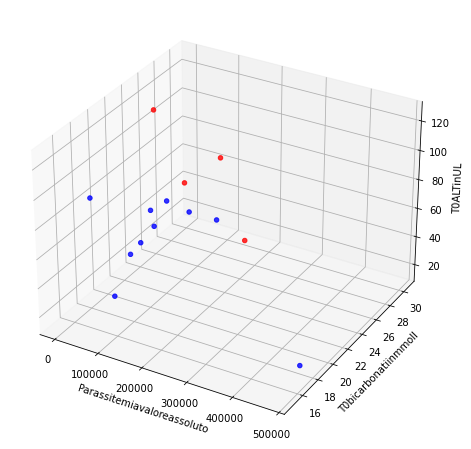

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is stored in the 'features' DataFrame
# Assuming the 'filtered_df' DataFrame contains the PADH values

# Create a larger 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

features = predictive_artsnt_df[['Parassitemiavaloreassoluto', 'T0ALTinUL', 'T0bicarbonatiinmmoll']]
# Extract the coordinates from the 'features' DataFrame
x = features['Parassitemiavaloreassoluto']
z = features['T0ALTinUL']
y = features['T0bicarbonatiinmmoll']


# Color mapping based on PADH values
PADH_values = filtered_df['PADH']
colors = ['red' if padh == 1 else 'blue' for padh in PADH_values]

# Plot the points in 3D with color mapping
ax.scatter(x, y, z, c=colors, marker='o', alpha=0.8)


# Set labels for each axis
ax.set_zlabel('T0ALTinUL')
ax.set_xlabel('Parassitemiavaloreassoluto')
ax.set_ylabel('T0bicarbonatiinmmoll')

# Show the 3D graph
plt.show()


In [28]:
import plotly.graph_objects as go

In [29]:
# Step 2: Create a 3D scatter plot using Plotly
features = predictive_artsnt_df[['Parassitemiavaloreassoluto', 'T0ALTinUL', 'T0bicarbonatiinmmoll']]

fig = go.Figure(data=[go.Scatter3d(
    x = features['Parassitemiavaloreassoluto'],
    z = features['T0ALTinUL'],
    y = features['T0bicarbonatiinmmoll'],
    mode='markers',
    marker=dict(
        size=2,
        color=colors,
        opacity=0.8
    )
)])

# Set the layout for the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Parassitemiavaloreassoluto'),
        yaxis=dict(title='T0bicarbonatiinmmoll'),
        zaxis=dict(title='T0ALTinUL')
    ),
    title='Latent Space Visualization'
)

# Display the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('visualizationPADHraw.html')

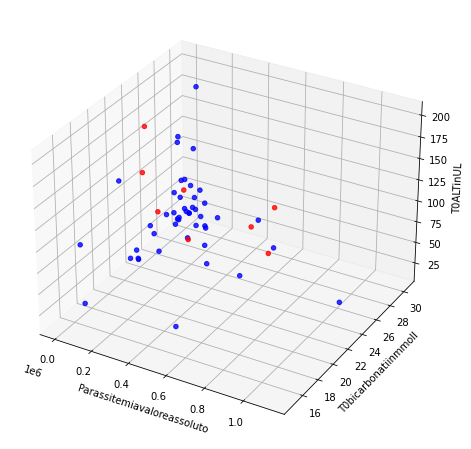

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is stored in the 'features' DataFrame
# Assuming the 'filtered_df' DataFrame contains the PADH values

# Create a larger 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

features = predictive_df[['Parassitemiavaloreassoluto', 'T0ALTinUL', 'T0bicarbonatiinmmoll']]
# Extract the coordinates from the 'features' DataFrame
x = features['Parassitemiavaloreassoluto']
z = features['T0ALTinUL']
y = features['T0bicarbonatiinmmoll']


# Color mapping based on PADH values
PADH_values = filtered_df['PADH']
colors = ['red' if padh == 1 else 'blue' for padh in PADH_values]

# Plot the points in 3D with color mapping
ax.scatter(x, y, z, c=colors, marker='o', alpha=0.8)


# Set labels for each axis
ax.set_zlabel('T0ALTinUL')
ax.set_xlabel('Parassitemiavaloreassoluto')
ax.set_ylabel('T0bicarbonatiinmmoll')

# Show the 3D graph
plt.show()


In [31]:
# Step 2: Create a 3D scatter plot using Plotly
features = predictive_df[['Parassitemiavaloreassoluto', 'T0ALTinUL', 'T0bicarbonatiinmmoll']]

fig = go.Figure(data=[go.Scatter3d(
    x = features['Parassitemiavaloreassoluto'],
    z = features['T0ALTinUL'],
    y = features['T0bicarbonatiinmmoll'],
    mode='markers',
    marker=dict(
        size=2,
        color=colors,
        opacity=0.8
    )
)])

# Set the layout for the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Parassitemiavaloreassoluto'),
        yaxis=dict(title='T0bicarbonatiinmmoll'),
        zaxis=dict(title='T0ALTinUL')
    ),
    title='Latent Space Visualization'
)

# Display the plot
fig.show()

# Save the plot as an HTML file
fig.write_html('visualizationPADHfilled.html')